### Feature Engineering on Application Dataset
- application_train+test main feature's distribution....EDA
- Additional treatment on application_train+test main feature

### Library and Application data set loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc, os, sys
import random
from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', 30)

In [2]:
train_path = os.path.join('D:\workspace1\Kaggle_Advanced_ML\data', 'application_train.csv')
test_path = os.path.join('D:\workspace1\Kaggle_Advanced_ML\data', 'application_test.csv')

In [3]:
app_train = pd.read_csv(train_path)
app_test = pd.read_csv(test_path)

In [4]:
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

In [5]:
app_train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
app_train['TARGET'].value_counts(dropna=False)

0    282686
1     24825
Name: TARGET, dtype: int64

In [11]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Visualization continuous features when the TARGET is 0 or 1
-violinplot and distplot for numerical features

In [16]:
num_columns = app_train.dtypes[app_train.dtypes!='object']
print(num_columns)

SK_ID_CURR                        int64
TARGET                            int64
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64
FLAG_PHONE                        int64
FLAG_EMAIL                        int64
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64


In [18]:
def show_hist_by_target(df, columns):
    cond_1 = df['TARGET']==1
    cond_0 = df['TARGET']==0
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), squeeze=False)
        sns.violinplot(x = 'TARGET', y = column, data=df, ax=axs[0][0])
        sns.distplot(df[cond_0][column], ax=axs[0][1], label='0', color='blue')
        sns.distplot(df[cond_1][column], ax=axs[0][1], label='1', color='red')

In [24]:
columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
           'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1',
           'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

app_train[columns].isna().sum()

AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
DAYS_REGISTRATION                  0
DAYS_LAST_PHONE_CHANGE             1
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
dtype: int64

- AMT_INCOME_TOTAL, AMT_CREDIT -> almost same for both cases
- AMT_ANNUITY -> almost same, but large annuity cases exist in case of TARGET=0
- AMT_GOOD_PRICE -> almost same for both cases
- DAYS_BIRTH -> Yonger people tends to have more cases of TARGET=1
- DAYS_EMPLOYED -> ERROR value? > 100000? less employed dats -> tends to have more case of TARGET=1
- DAYS_ID_PUBLISH, DAYS_REGISTRATION -> More cases at recent values in case of TARGET=1
- DAYS_LAST_PHONE_CHANGE -> almost same, slightly more cases in the -1000~0 range in case of TARGET=1
- CNT_FAM_MEMBERS -> almost same
- REGION_RATING_CLIENT -> almost same
- EXT_SOURCE_1~3 -> big difference (seems like credit score)


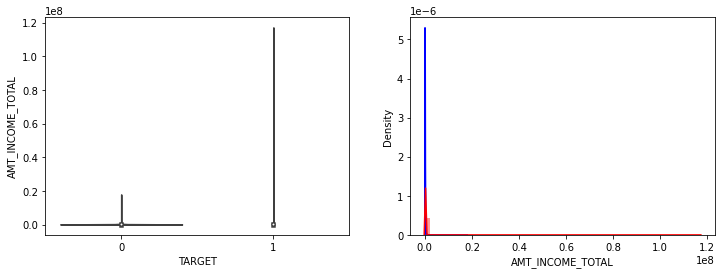

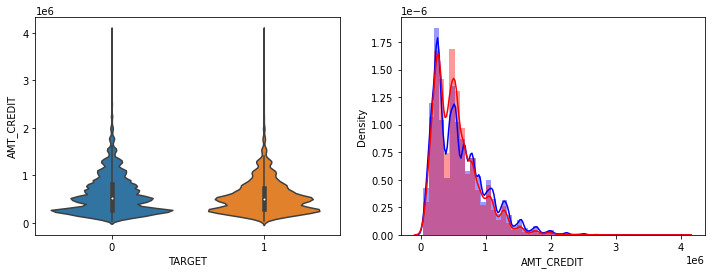

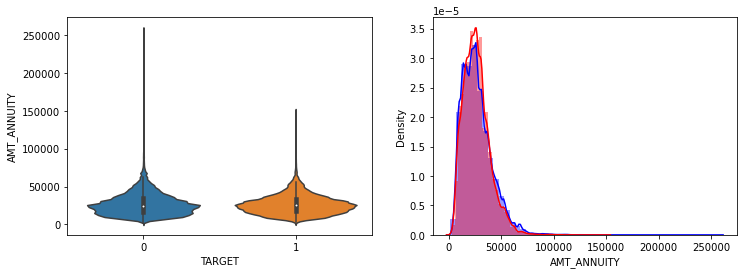

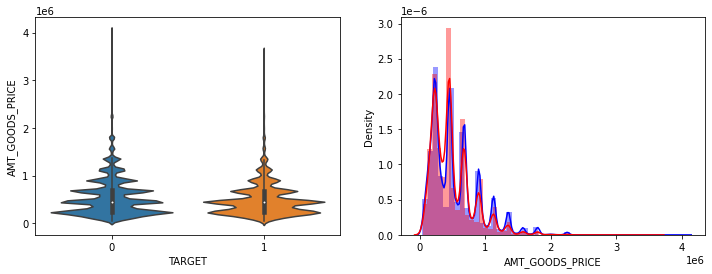

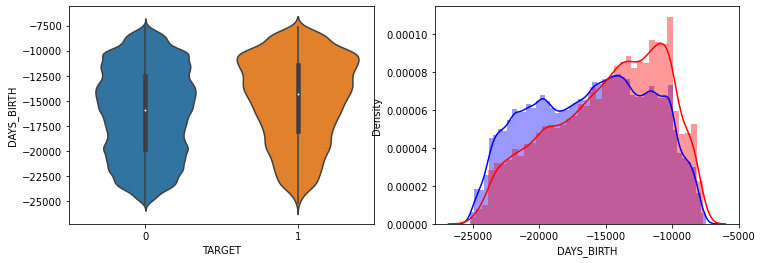

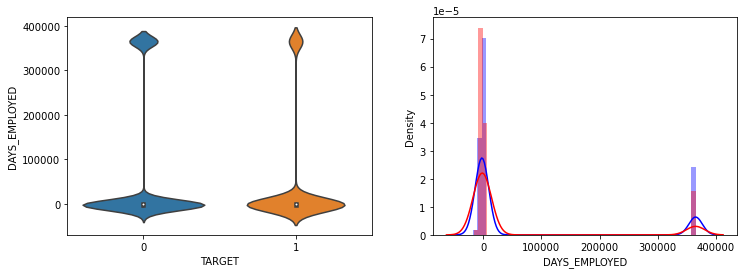

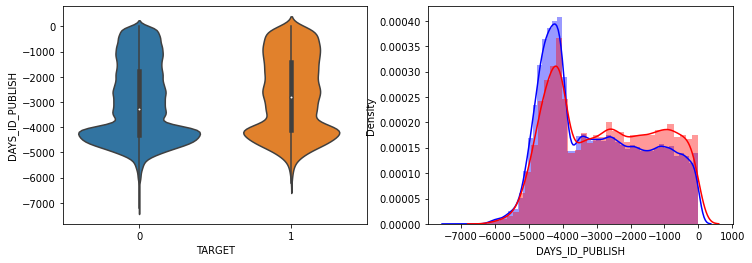

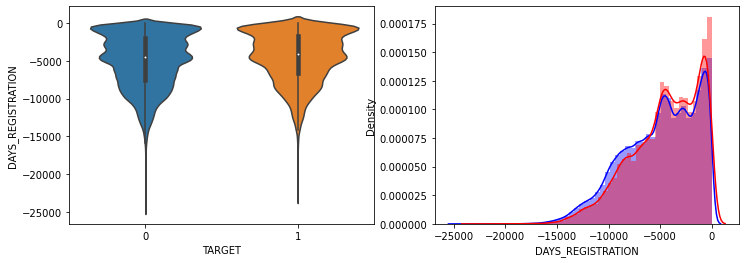

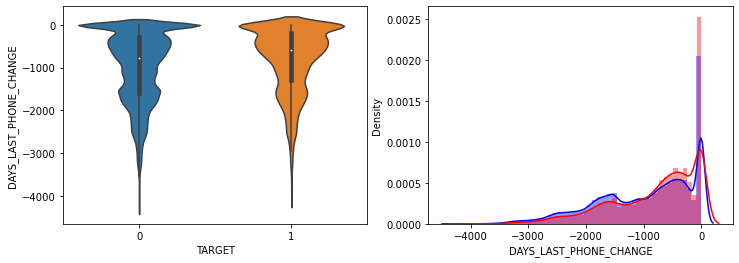

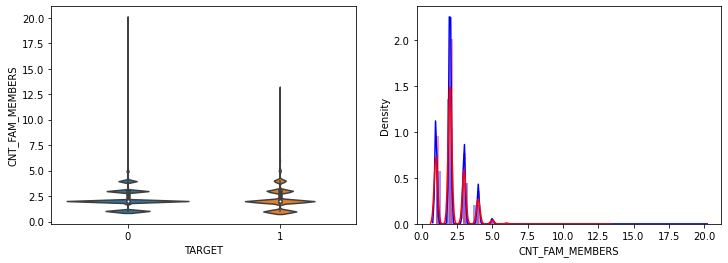

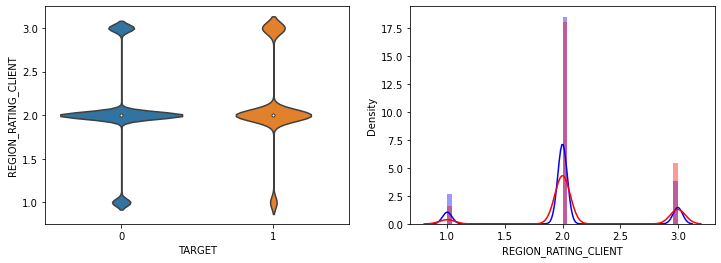

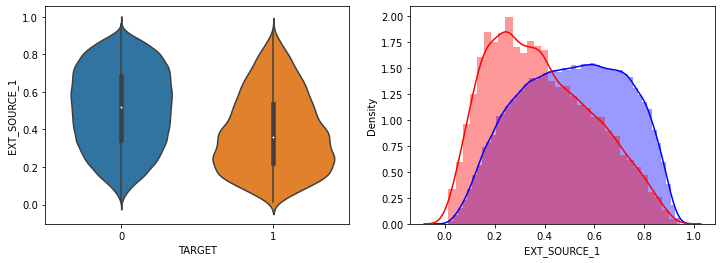

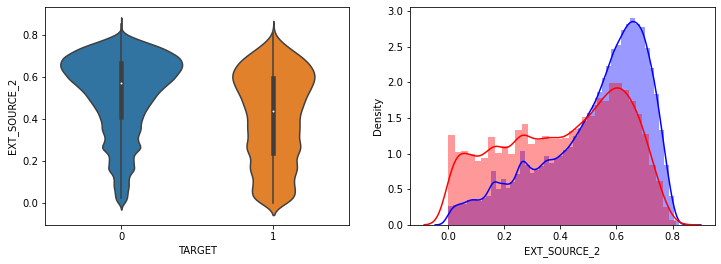

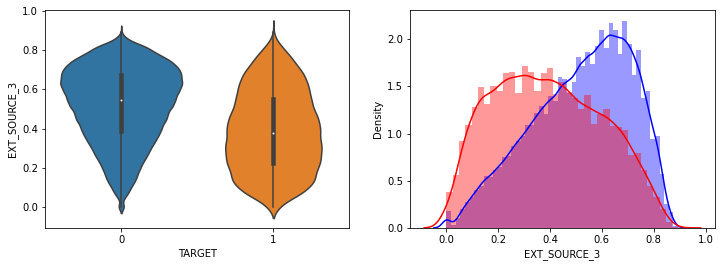

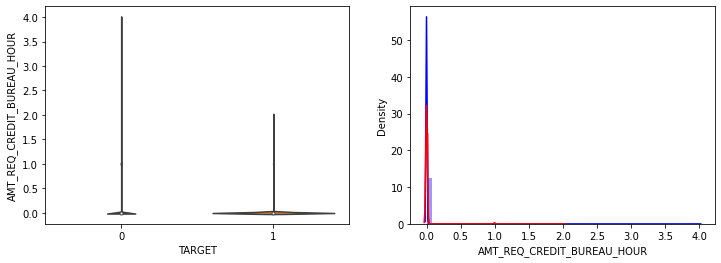

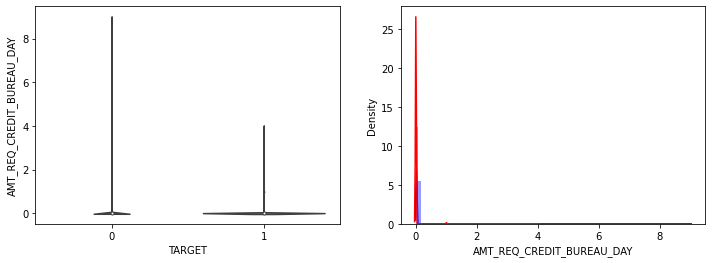

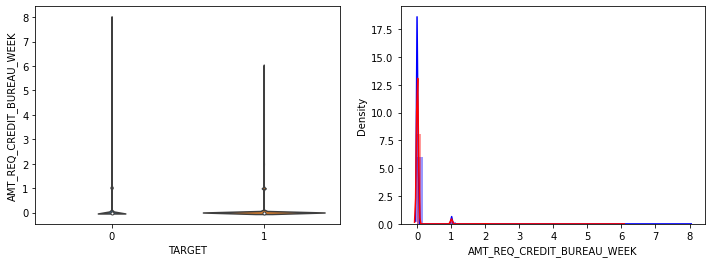

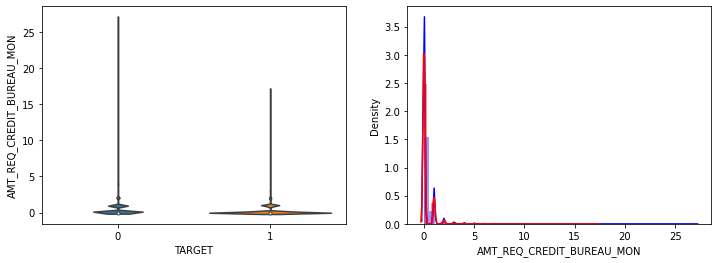

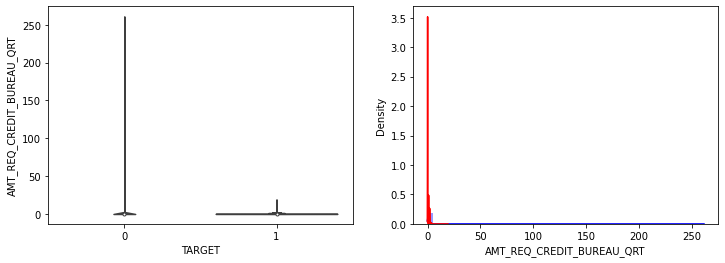

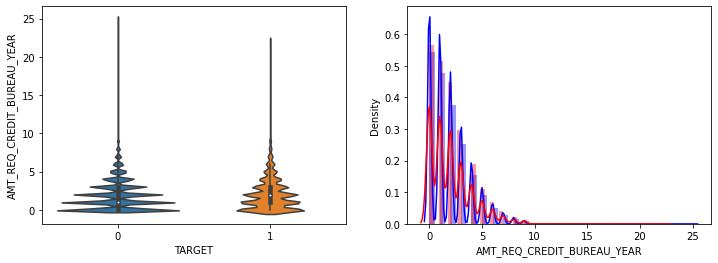

In [25]:
show_hist_by_target(app_train, columns)

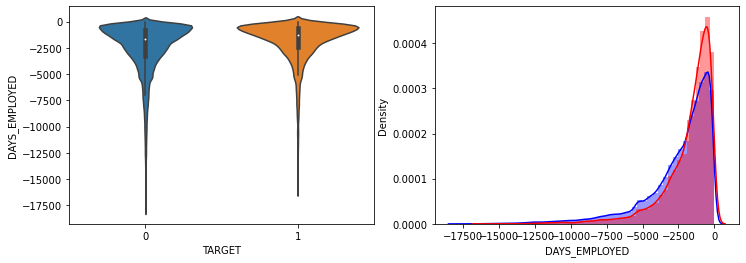

In [27]:
show_hist_by_target(app_train[app_train['DAYS_EMPLOYED']<100000], ['DAYS_EMPLOYED'])

### Category feature (object column) comparison according to the TARGET value using Seaborn countplot() and catplot()

In [32]:
object_columns = app_train.dtypes[app_train.dtypes=='object'].index.tolist()
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

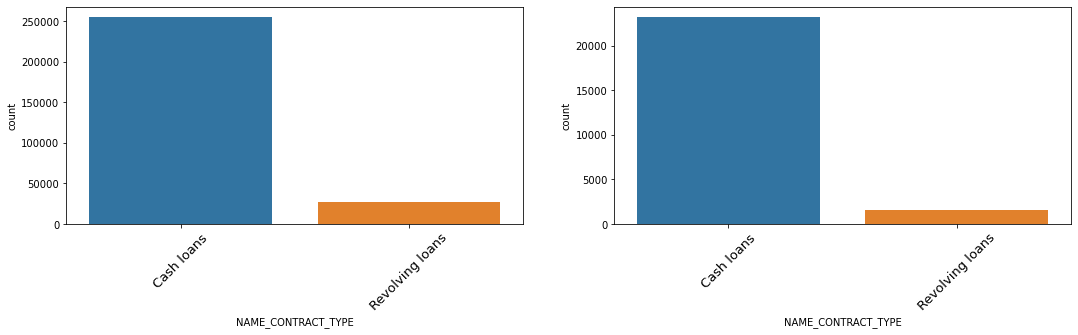

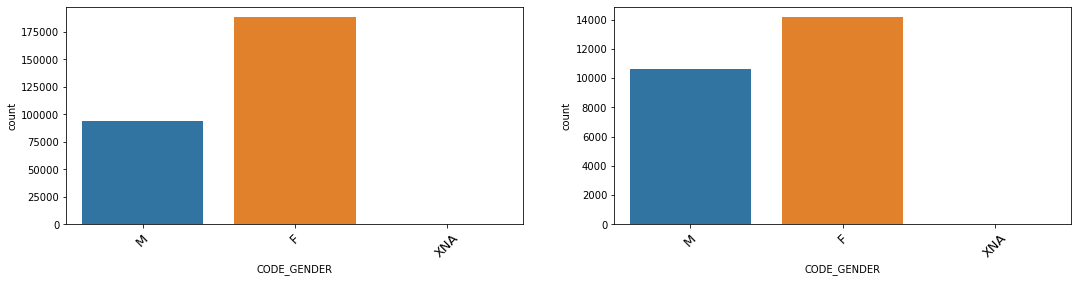

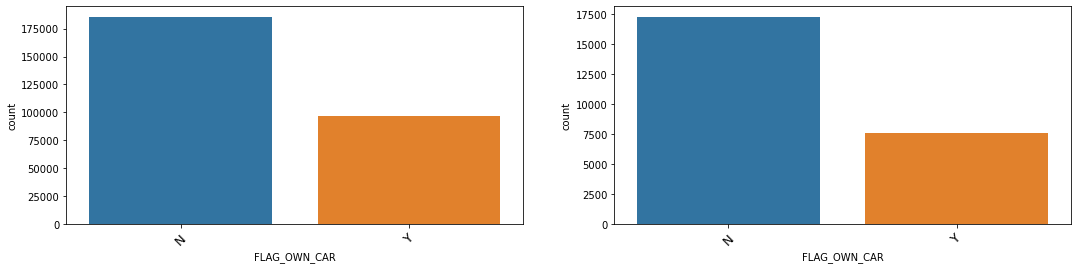

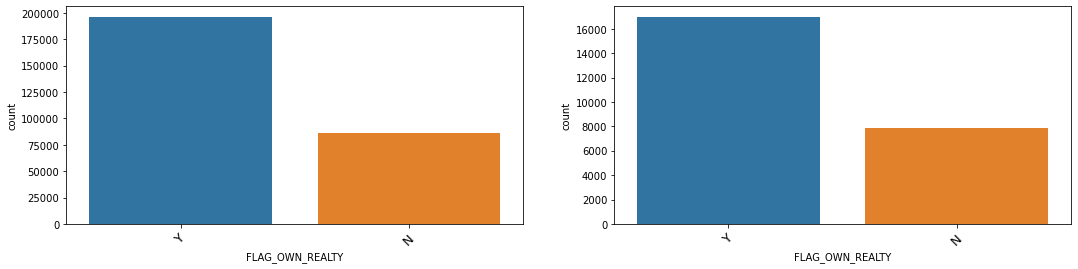

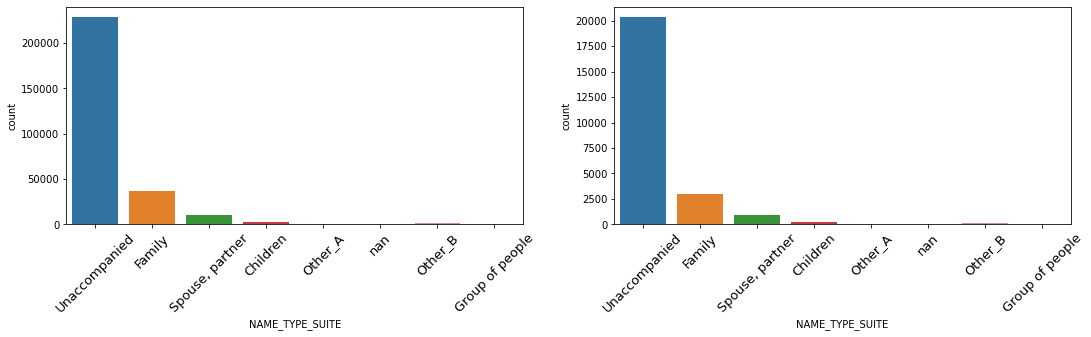

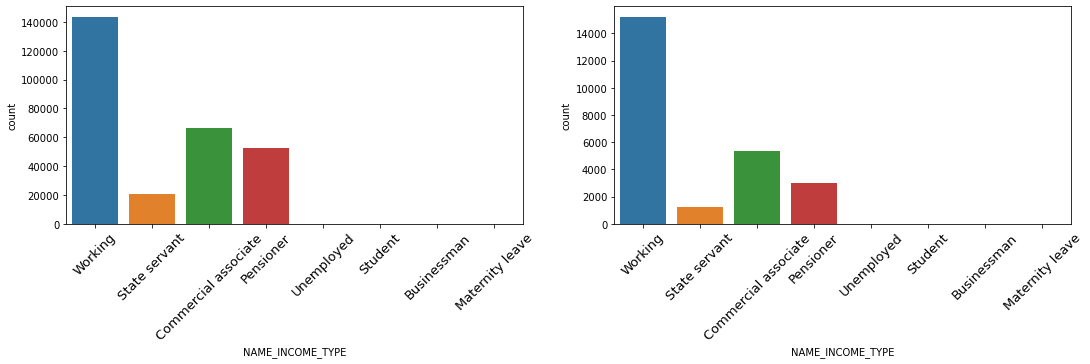

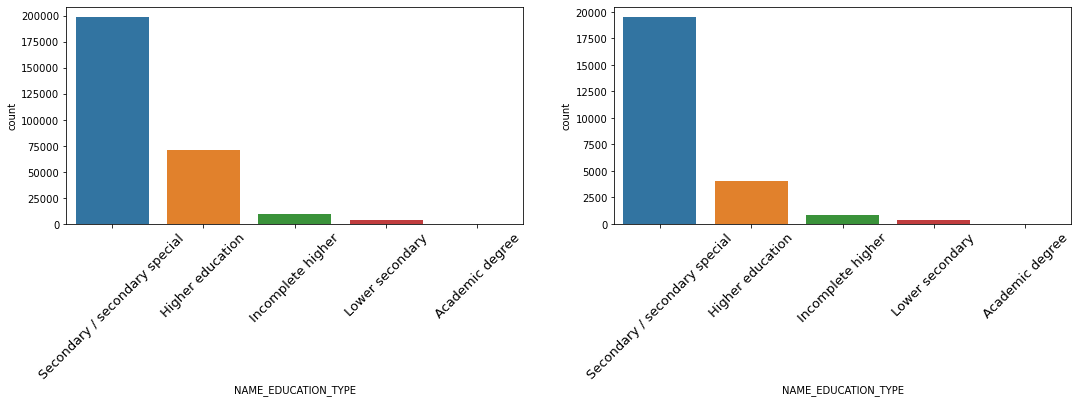

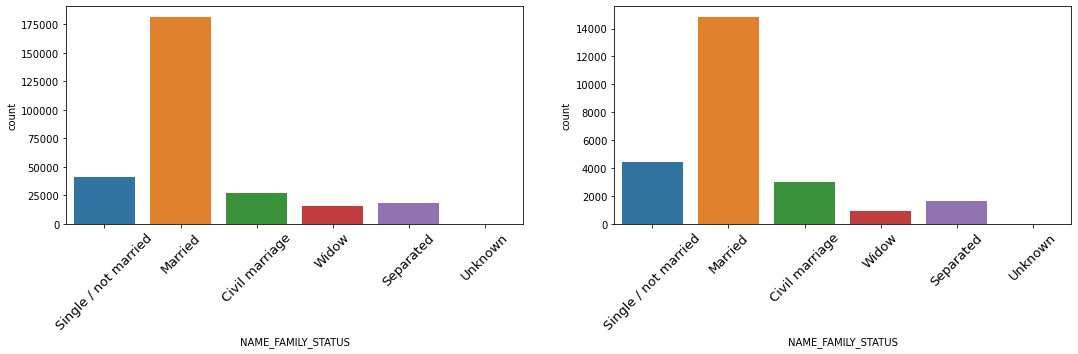

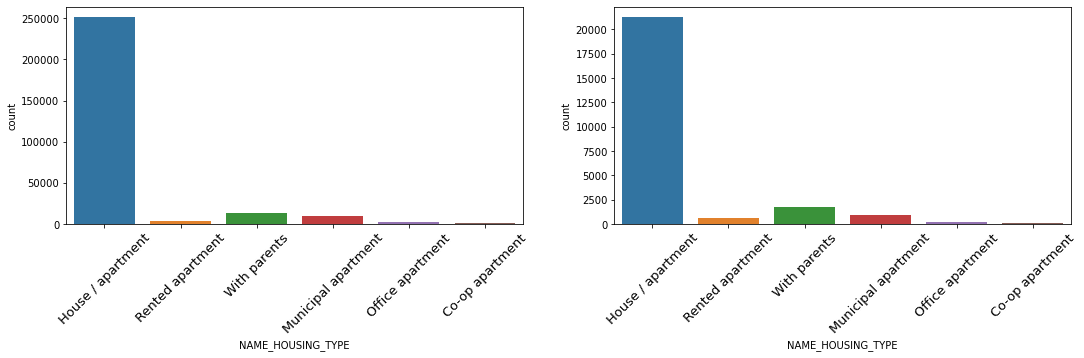

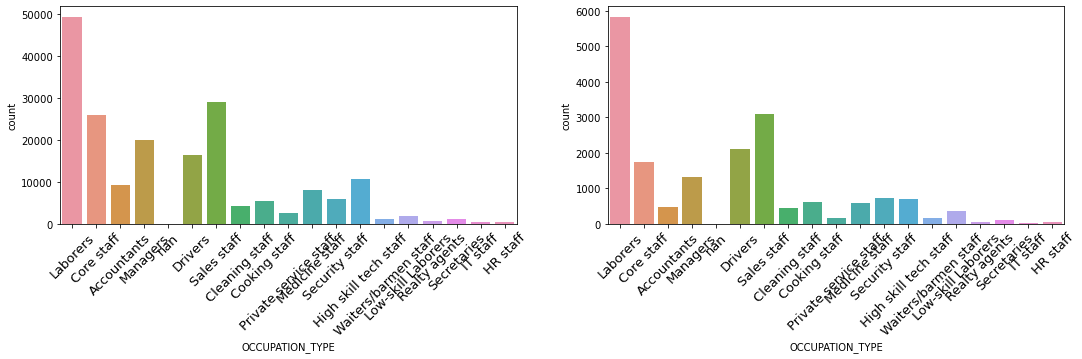

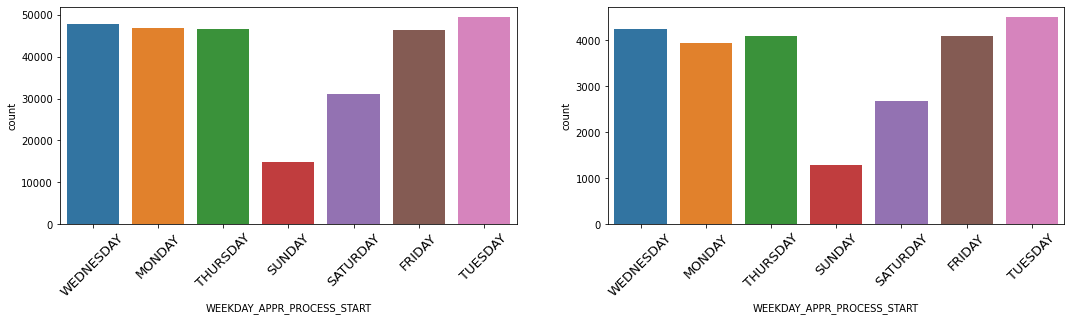

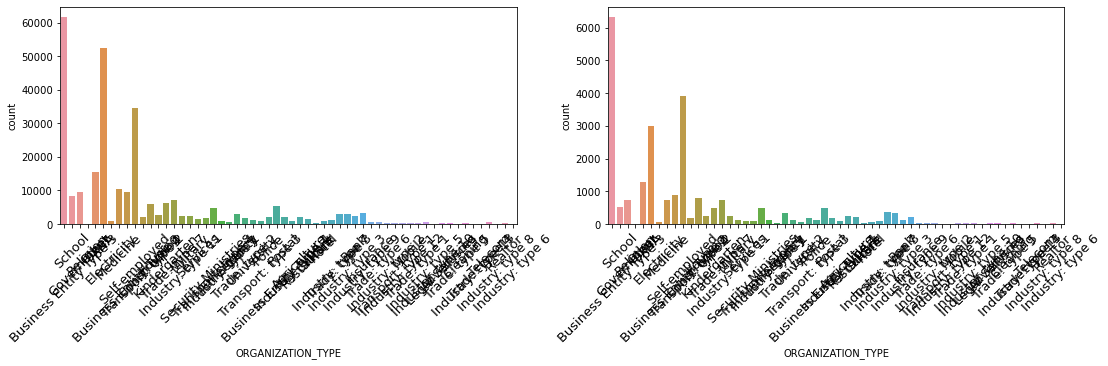

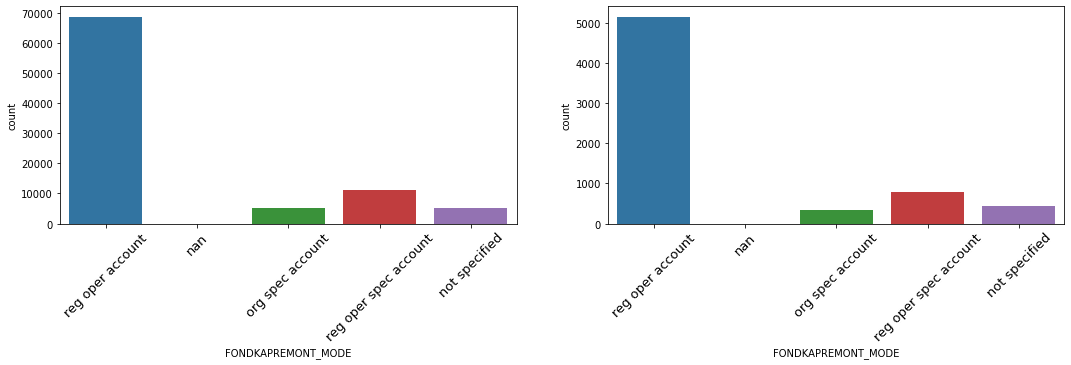

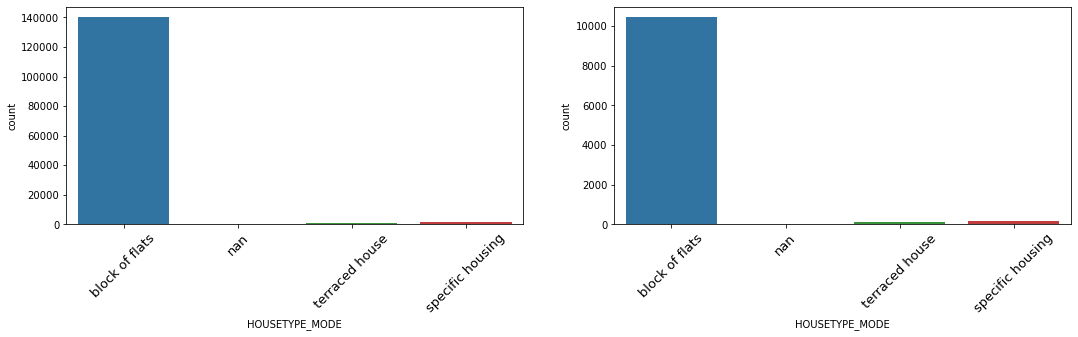

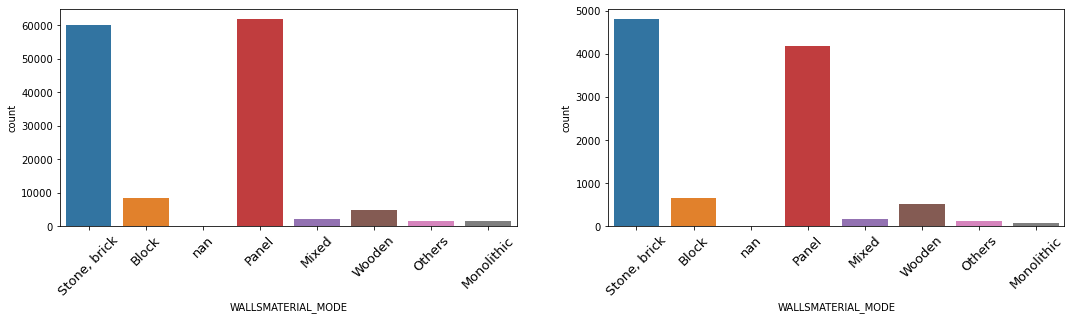

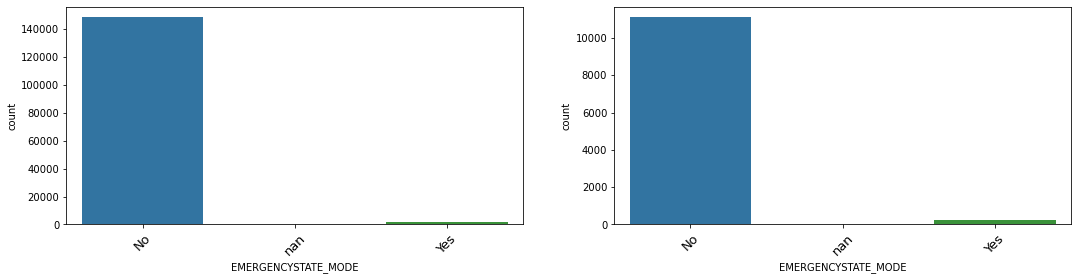

In [73]:
def show_count_by_target(df, columns):
    cond_0 = df['TARGET']==0
    cond_1 = df['TARGET']==1
    
    for column in columns:
        fig, axs = plt.subplots(figsize=(18, 4), nrows=1, ncols=2, squeeze=False)
        # countplot()
        chart0 = sns.countplot(df[cond_0][column], ax=axs[0][0], order = df[column].unique().tolist())
        chart1 = sns.countplot(df[cond_1][column], ax=axs[0][1], order = df[column].unique().tolist())
        # x label rotation
        chart0.set_xticklabels(chart0.get_xticklabels(), rotation=45, fontsize=13)
        chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45, fontsize=13)

show_count_by_target(app_train, object_columns)      

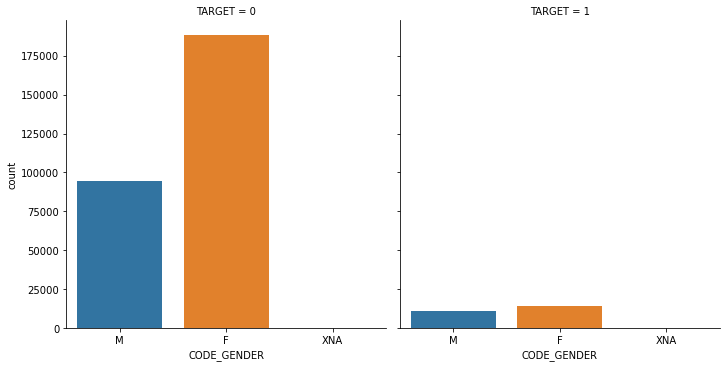

In [74]:
# catplot() -> multiple countplots according to the column condition
sns.catplot(x='CODE_GENDER', col='TARGET', data=app_train, kind='count')

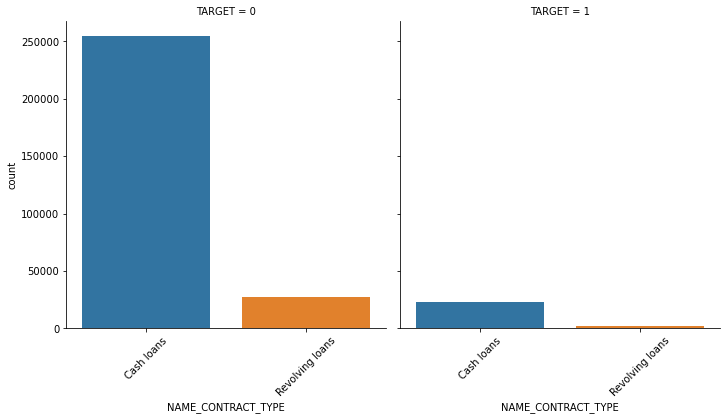

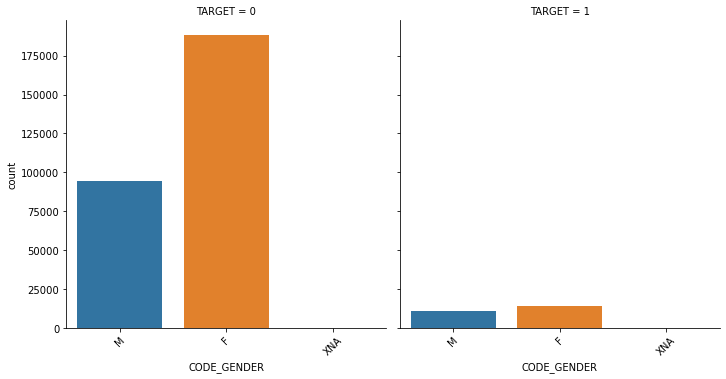

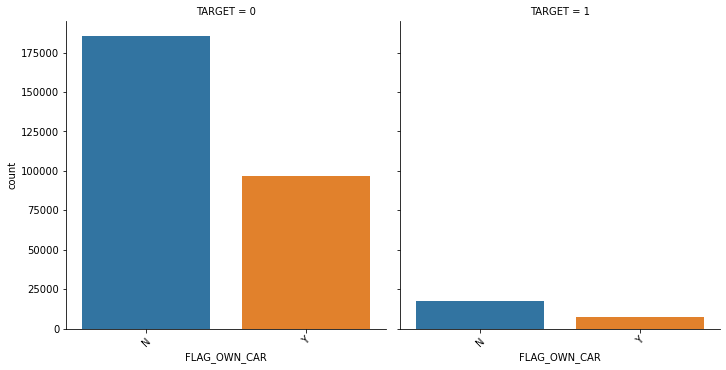

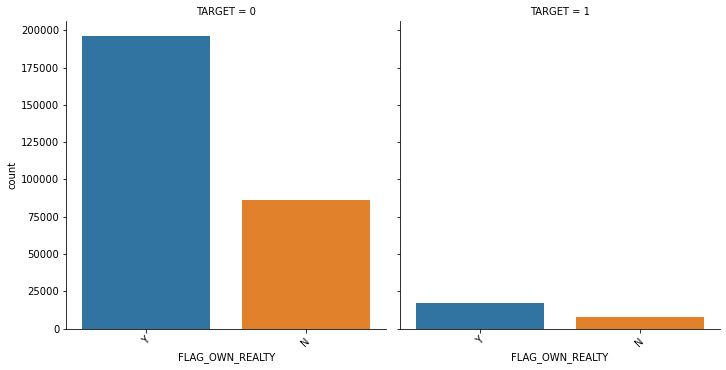

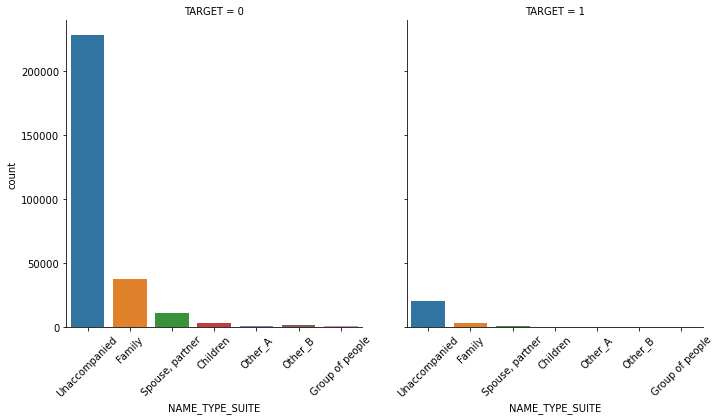

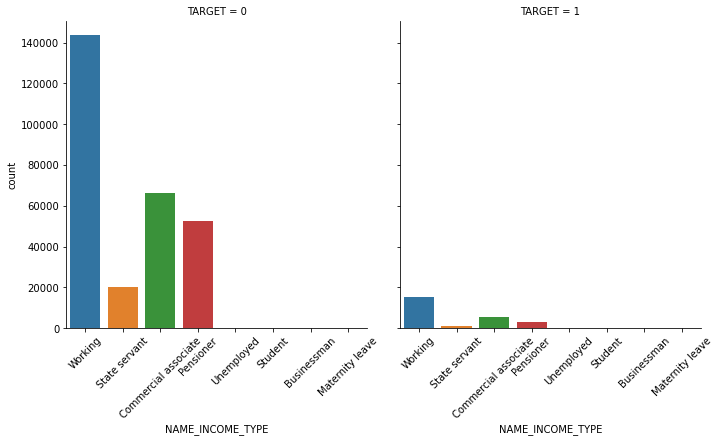

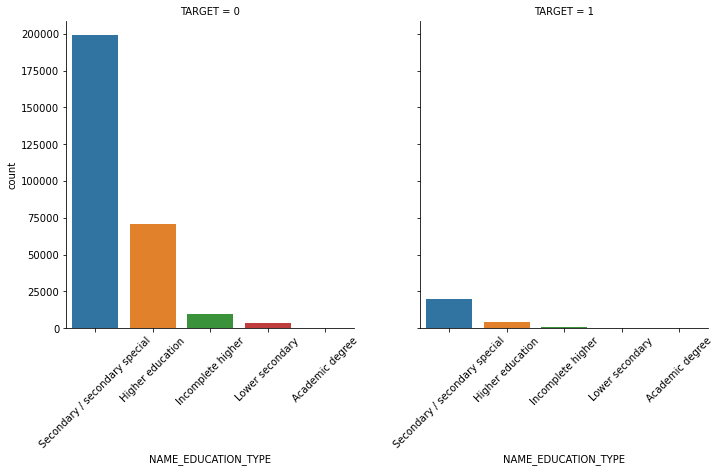

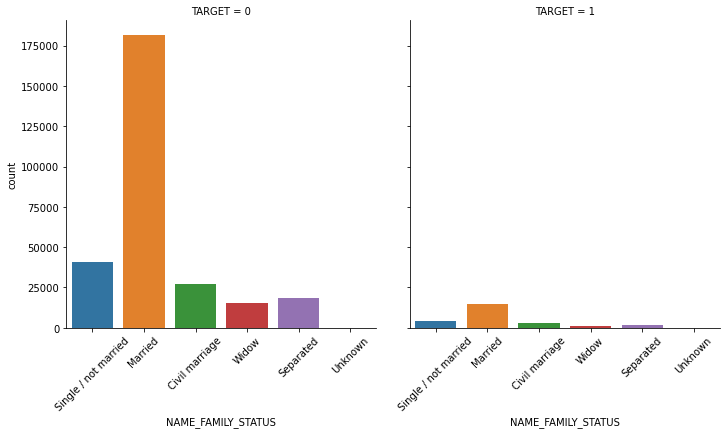

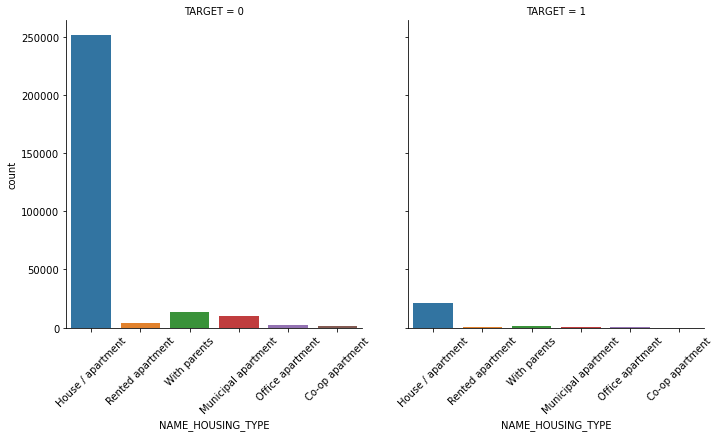

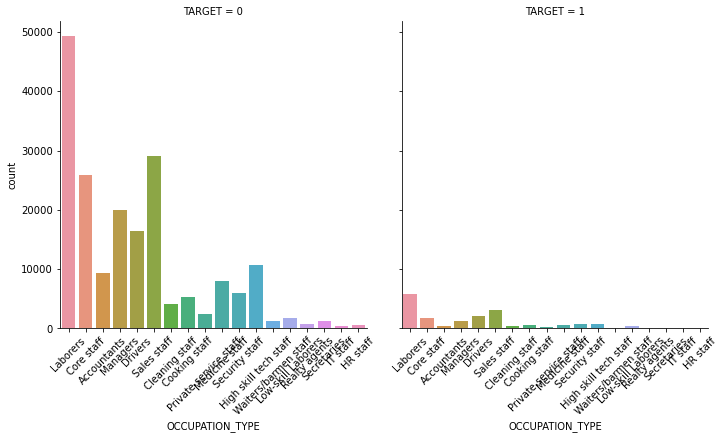

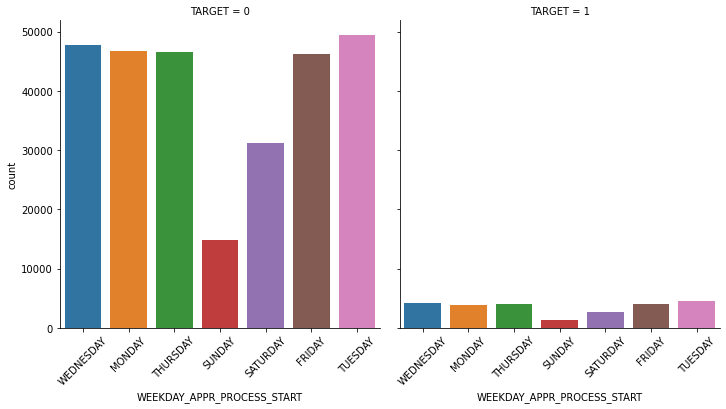

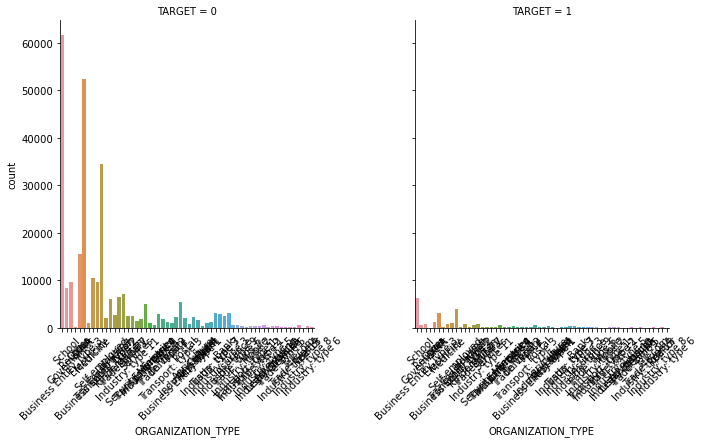

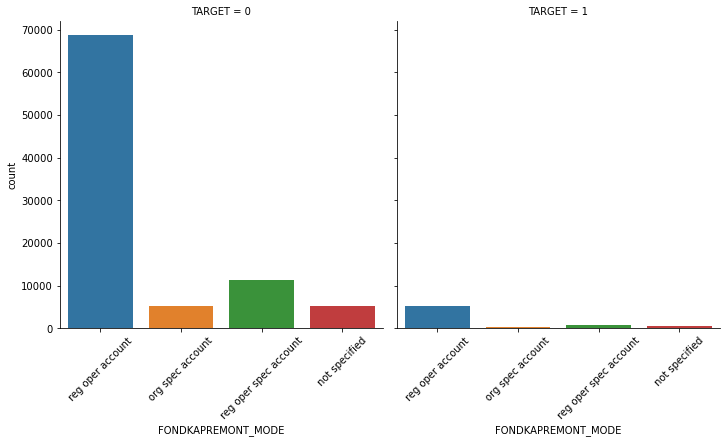

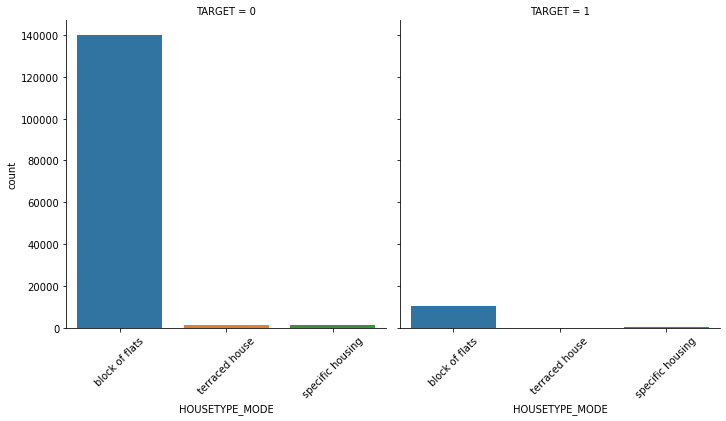

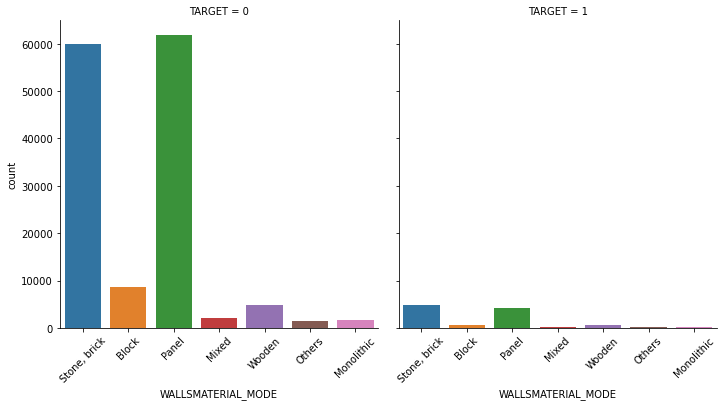

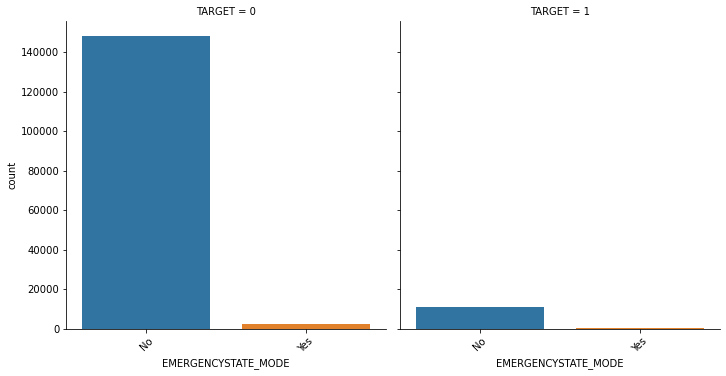

In [76]:
def show_category_by_target(df, columns):
    for column in columns:
        chart = sns.catplot(x=column, col='TARGET', data=df, kind='count')
        chart.set_xticklabels(rotation=45)

show_category_by_target(app_train, object_columns)

### Male have stornger tendency in defaulting compered to female

In [11]:
cond_1 = app_train['TARGET'] == 1
cond_0 = app_train['TARGET'] == 0
cond_f = app_train['CODE_GENDER'] == 'F'
cond_m = app_train['CODE_GENDER'] == 'M'

# Male Female ratio to total number of records
print(app_train['CODE_GENDER'].value_counts()/app_train.shape[0])
# TARGET=1
print(app_train[cond_1]['CODE_GENDER'].value_counts()/app_train[cond_1].shape[0])
# TARGET=0
print(app_train[cond_0]['CODE_GENDER'].value_counts()/app_train[cond_0].shape[0])

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64
F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64
F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64


### Correlation with TARGET

In [12]:
corr_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'TARGET']
corr = app_train[corr_columns].corr()

<AxesSubplot:>

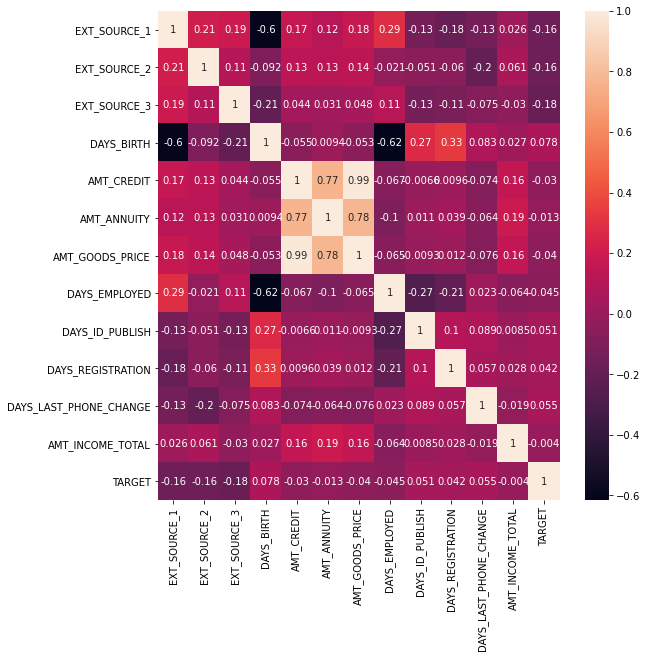

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot=True)

### Outlier check and modifying outliers in DAYS_EMPLOYED 

In [16]:
### 365243 -> weird -> change to null
app_train['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-11060         1
-10409         1
-10155         1
-11948         1
-12341         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [17]:
# CODE_GENDER : 4 XNA...maybe transgender? => let it be
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [19]:
# LightGBM can use NULL when it makes tree model.
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].replace(365243, np.nan)
app_train['DAYS_EMPLOYED'].value_counts(dropna=False)

 NaN        55374
-200.0        156
-224.0        152
-230.0        151
-199.0        151
            ...  
-9681.0         1
-13421.0        1
-9703.0         1
-11283.0        1
-13497.0        1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

### Feature engineering
#### EXT_SOURCE value check, EXT_SOURCE_X features' mean, max, standard deviation

In [20]:
app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64

In [21]:
app_train['EXT_SOURCE_1'].value_counts(dropna=False)

NaN         173378
0.546426         5
0.598469         5
0.622707         5
0.605152         5
             ...  
0.288500         1
0.807598         1
0.237983         1
0.412337         1
0.615170         1
Name: EXT_SOURCE_1, Length: 114585, dtype: int64

In [22]:
app_train['EXT_SOURCE_2'].value_counts(dropna=False)

0.285898    721
NaN         660
0.262258    417
0.265256    343
0.159679    322
           ... 
0.009063      1
0.457284      1
0.017615      1
0.371661      1
0.064909      1
Name: EXT_SOURCE_2, Length: 119832, dtype: int64

In [23]:
app_train['EXT_SOURCE_3'].value_counts(dropna=False)

NaN         60965
0.746300     1460
0.713631     1315
0.694093     1276
0.670652     1191
            ...  
0.028674        1
0.896010        1
0.858178        1
0.017506        1
0.028275        1
Name: EXT_SOURCE_3, Length: 815, dtype: int64

In [25]:
# EXT_SOURCE_X min, max, mean, standard deviation
print('### mean ###\n', app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean())
print('### max ###\n', app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].max())
print('### min ###\n', app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].min())
print('### std ###\n', app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std())

### mean ###
 EXT_SOURCE_1    0.502130
EXT_SOURCE_2    0.514393
EXT_SOURCE_3    0.510853
dtype: float64
### max ###
 EXT_SOURCE_1    0.962693
EXT_SOURCE_2    0.855000
EXT_SOURCE_3    0.896010
dtype: float64
### min ###
 EXT_SOURCE_1    1.456813e-02
EXT_SOURCE_2    8.173617e-08
EXT_SOURCE_3    5.272652e-04
dtype: float64
### std ###
 EXT_SOURCE_1    0.211062
EXT_SOURCE_2    0.191060
EXT_SOURCE_3    0.194844
dtype: float64


### Fuse train, test dataset before preprocessing

In [26]:
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

In [28]:
apps = pd.concat([app_train, app_test])
apps.shape

(356255, 122)

### EXT_SOURCE_X Feature processing
#### By using EXT_SOURCE_X feautres, generate new features (mean, and std)

In [30]:
apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APPS_EXT_SOURCE_MEAN', 'APPS_EXT_SOURCE_STD']].head(5)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APPS_EXT_SOURCE_MEAN,APPS_EXT_SOURCE_STD
0,0.083037,0.262949,0.139376,0.161787,0.092026
1,0.311267,0.622246,NaN,0.466757,0.219895
2,NaN,0.555912,0.729567,0.642739,0.122792
3,NaN,0.650442,NaN,0.650442,NaN
4,NaN,0.322738,NaN,0.322738,NaN


In [31]:
apps['APPS_EXT_SOURCE_STD'].isnull().sum()

40950

In [32]:
# If STD feature is NULL, replace it with mean
apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())
apps['APPS_EXT_SOURCE_STD'].isnull().sum()

0

### AMT_CREDIT ratio feature processing

In [56]:
apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_CREDIT']
apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_CREDIT']
apps['APPS_CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] - apps['AMT_GOODS_PRICE']

### AMT_INCOME_TOTAL ratio feature processing

In [33]:
apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_INCOME_TOTAL']
apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT']/apps['AMT_INCOME_TOTAL']
apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_INCOME_TOTAL']
# consider number of family
apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['CNT_FAM_MEMBERS']

### DAYS_BIRTH, DAYS_EMPLOYED RATIO feature processing

In [34]:
apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED']/apps['DAYS_BIRTH']
apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_EMPLOYED']
apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_BIRTH']
apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE']/apps['DAYS_BIRTH']
apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE']/apps['DAYS_EMPLOYED']

### Data label encoding using factorize(). Don't need to treat NULL as it can be dealt by LightGBM

In [57]:
object_columns = apps.dtypes[apps.dtypes=='object'].index.tolist()
for column in object_columns:
    apps[column] = pd.factorize(apps[column])[0]

In [58]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 136 entries, SK_ID_CURR to APPS_CREDIT_GOODS_DIFF
dtypes: float64(81), int64(55)
memory usage: 372.4 MB


### Train, test data split

In [59]:
apps['TARGET'].value_counts(dropna=False)

0.0    282686
NaN     48744
1.0     24825
Name: TARGET, dtype: int64

In [60]:
apps_test = apps[apps['TARGET'].isnull()]
apps_train = apps[~apps['TARGET'].isnull()]
apps_test = apps_test.drop('TARGET', axis=1)
apps_train.shape, apps_test.shape

((307511, 136), (48744, 135))

### Train data split for validation set, LGBMClassifier

In [61]:
from sklearn.model_selection import train_test_split

ftr_app = apps_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = apps_train['TARGET']

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2020)
train_x.shape, valid_x.shape

((215257, 134), (92254, 134))

In [62]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
    n_jobs=-1,
    n_estimators=1000,
    learning_rate=0.02,
    num_leaves=32,
    subsample=0.8,
    max_depth=12,
    silent=-1,
    verbose=-1)

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric='auc', verbose=100, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.759726	training's binary_logloss: 0.24754	valid_1's auc: 0.749339	valid_1's binary_logloss: 0.249516
[200]	training's auc: 0.780471	training's binary_logloss: 0.240508	valid_1's auc: 0.759905	valid_1's binary_logloss: 0.245532
[300]	training's auc: 0.794494	training's binary_logloss: 0.235945	valid_1's auc: 0.763886	valid_1's binary_logloss: 0.244172
[400]	training's auc: 0.806007	training's binary_logloss: 0.232261	valid_1's auc: 0.765383	valid_1's binary_logloss: 0.243635
[500]	training's auc: 0.816276	training's binary_logloss: 0.229006	valid_1's auc: 0.765464	valid_1's binary_logloss: 0.243539
[600]	training's auc: 0.825884	training's binary_logloss: 0.225871	valid_1's auc: 0.765668	valid_1's binary_logloss: 0.243463
[700]	training's auc: 0.834999	training's binary_logloss: 0.222851	valid_1's auc: 0.76584	valid_1's binary_logloss: 0.243374
[800]	training's auc: 0.843362	training's binary_logloss: 

LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

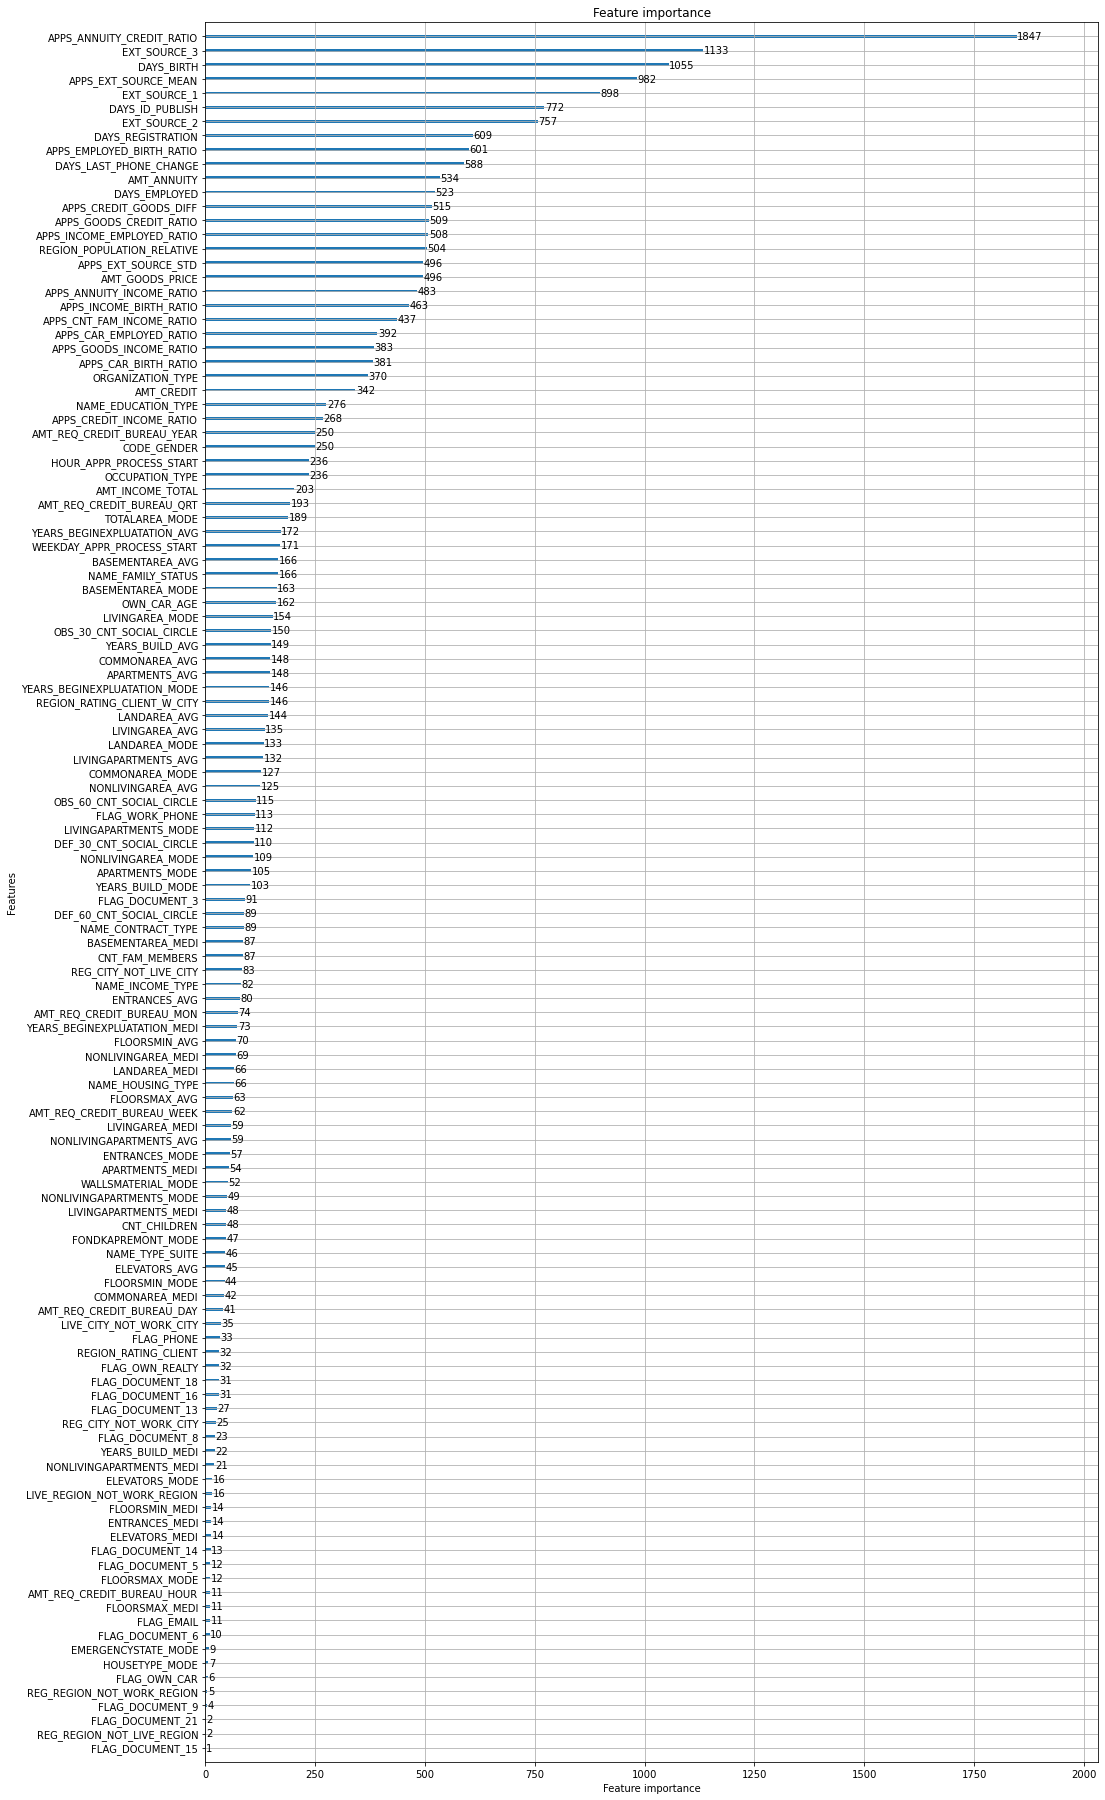

In [63]:
from lightgbm import plot_importance
plot_importance(clf, figsize=(16,32))

### Prediction using Test data, and submit it to Kaggle

In [64]:
preds = clf.predict_proba(apps_test.drop(['SK_ID_CURR'], axis=1))[:,1]

In [65]:
apps_test['TARGET'] = preds
apps_test[['SK_ID_CURR', 'TARGET']].to_csv('apps_baseline_02.csv', index=False)

### Application data set feature engineering function

In [66]:
def get_apps_processed(apps):
    
    # EXT_SOURCE_X Feature processing
    apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())

    # AMT_CREDIT feature processing
    apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_CREDIT']
    apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_CREDIT']
    apps['APPS_CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] - apps['AMT_GOODS_PRICE']

    # AMT_INCOME_TOTAL feature processing
    apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_INCOME_TOTAL']
    apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT']/apps['AMT_INCOME_TOTAL']
    apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_INCOME_TOTAL']
    apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['CNT_FAM_MEMBERS']

    # DAYS_BIRTH, DAYS_EMPLOYED Feature processing
    apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED']/apps['DAYS_BIRTH']
    apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_EMPLOYED']
    apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_BIRTH']
    apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE']/apps['DAYS_BIRTH']
    apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE']/apps['DAYS_EMPLOYED']
    
    return apps